In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt

from src.nn.inference.melody_inference import MelodyInference
from src.data.structures.melody import Melody

c:\Users\sanya\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
split = "test"
file = "verse"

In [13]:
audio = f"..\\datasets\\melody_extraction\\processed\\{split}\\audio\\{file}.wav"
midi = f"..\\datasets\\melody_extraction\\processed\\{split}\\labels\\{file}.mid"

In [15]:
from src.data.datasets.melody_dataset import MelodyDataset
from src.data.datasets.audio_dataset import AudioDataset

dataset = MelodyDataset.from_path(
    "..\\datasets\\melody_extraction\\processed\\train",
    hop_size=4,
)

audio_dataset = AudioDataset(dataset.sliced_audio[:2])
audio_dataset.sliced_audio = dataset.sliced_audio[:2]

Slicing audio: 100%|██████████| 2/2 [00:00<00:00, 36.05it/s]


array([<Axes: xlabel='Время, с', ylabel='Частота, Гц'>,
       <Axes: xlabel='Время, с'>], dtype=object)

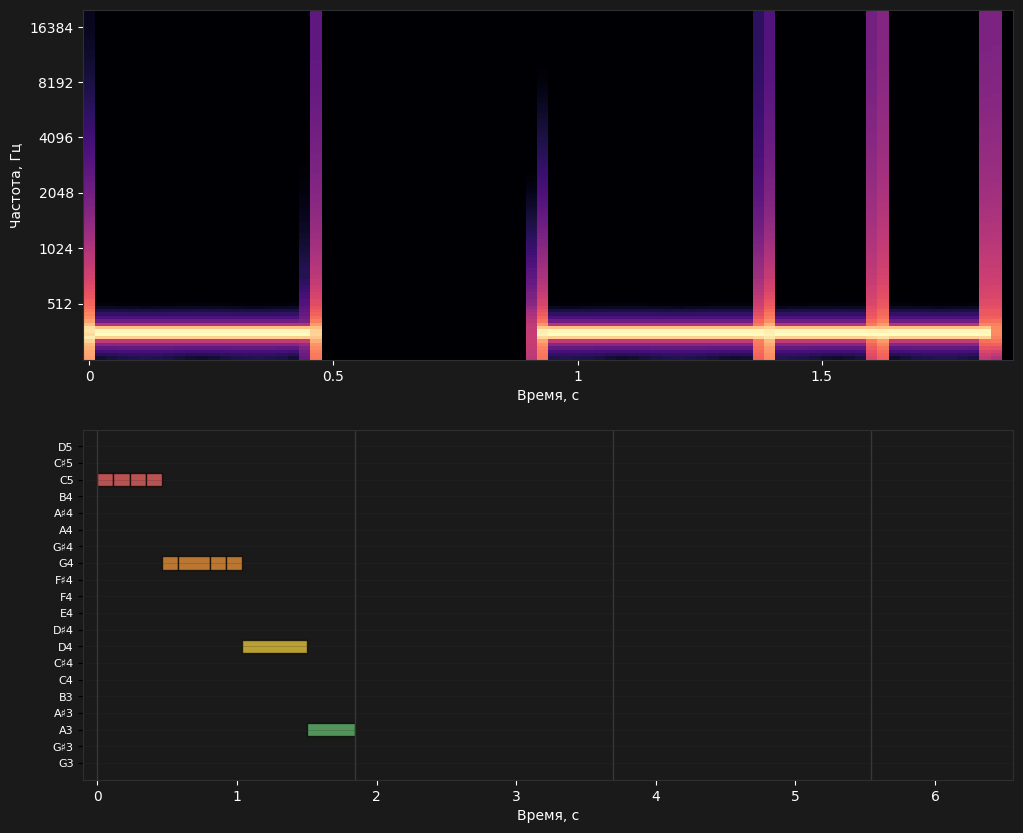

In [16]:
from src.data.structures.sample import Sample

audio = dataset.sliced_audio[0]
melody = dataset.sliced_melody[0]

sample = Sample(audio, melody)
sample.visualize_with_spectrogram()

In [17]:
melody_inference = MelodyInference("..\\src\\nn\\logs\\fix_denoise\\checkpoints\\best.ckpt")

<Axes: xlabel='Время, с'>

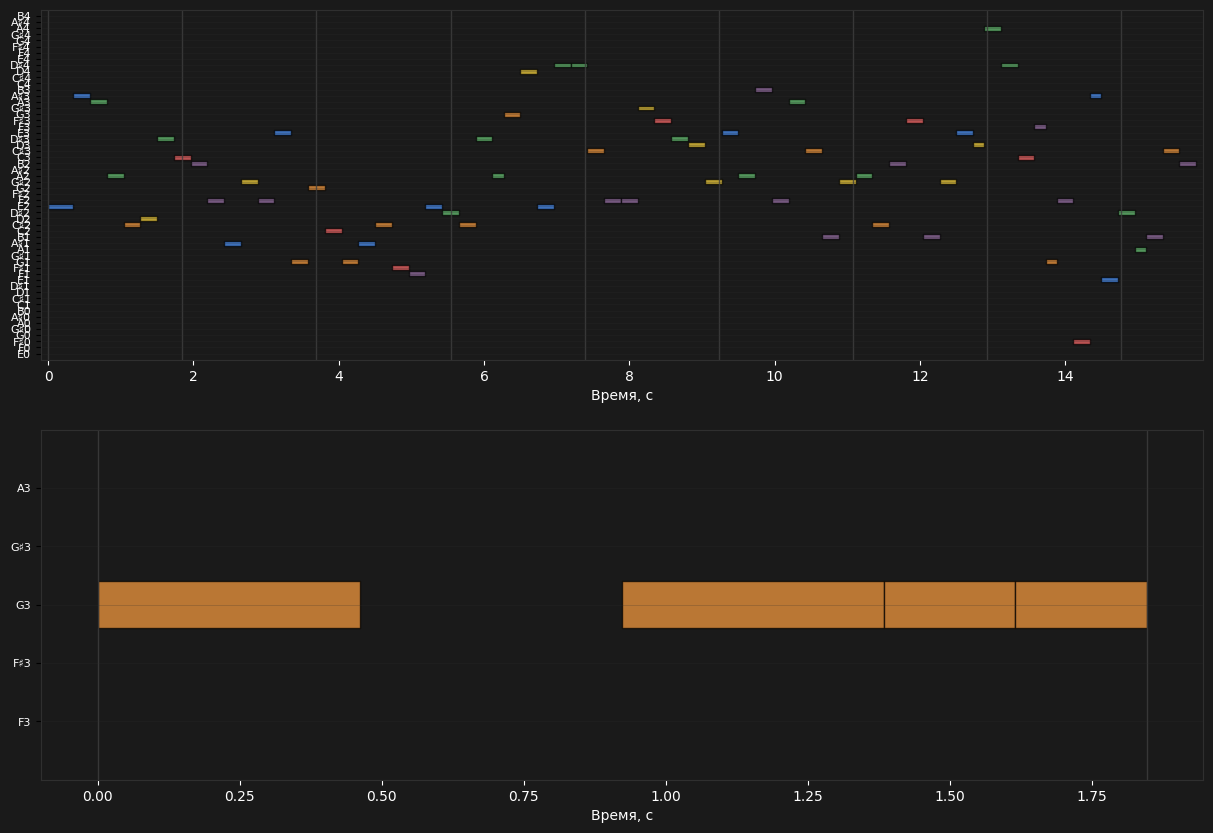

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.patch.set_facecolor('#1A1A1A')

melody = melody_inference.extract_melody(audio_dataset, tempo=130)
melody.visualize(ax=ax[0])

target = Melody.from_midi(midi)
target.visualize(ax=ax[1])